In [172]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns


In [173]:
df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")

C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\2511857008.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")


In [174]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [175]:
df.shape

(6500000, 18)

In [176]:
df.isna().sum()

VendorID                 79229
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          79229
trip_distance                0
RatecodeID               79229
store_and_fwd_flag       79229
PULocationID                 0
DOLocationID                 0
payment_type             79229
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [177]:
df.isna().sum().sum()

396145

In [178]:
df_cleaned = df.dropna()
df_cleaned.shape

(6420771, 18)

In [179]:
print(df.shape[0] - df_cleaned.shape[0])

79229


In [180]:
df["PULocationID"].nunique()

261

In [181]:
df_cleaned[df_cleaned["total_amount"] <= 0].shape

(21457, 18)

In [182]:
df_cleaned = df_cleaned[df_cleaned["total_amount"] > 0]

In [183]:
df_cleaned.shape

(6399314, 18)

In [184]:
df_cleaned.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [185]:
dfTest = df_cleaned[:50000]

In [186]:
dfTest.loc[:, "tpep_dropoff_datetime"] = dfTest["tpep_dropoff_datetime"].apply(lambda x: x.replace("AM", ""))
dfTest.loc[:, "tpep_pickup_datetime"] = dfTest["tpep_pickup_datetime"].apply(lambda x: x.replace("AM", ""))

dfTest.loc[:, "tpep_dropoff_datetime"] = dfTest["tpep_dropoff_datetime"].apply(lambda x: x.replace("PM", ""))
dfTest.loc[:, "tpep_pickup_datetime"] = dfTest["tpep_pickup_datetime"].apply(lambda x: x.replace("PM", ""))

dfTest["tpep_dropoff_datetime"] = pd.to_datetime(dfTest["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")
dfTest["tpep_pickup_datetime"] = pd.to_datetime(dfTest["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\2798450514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["tpep_dropoff_datetime"] = pd.to_datetime(dfTest["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")
C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\2798450514.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["tpep_pickup_datetime"] = pd.to_datetime(dfTest["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")


In [187]:
print(type(dfTest["tpep_dropoff_datetime"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [188]:
dfTest["time_diff"] = dfTest["tpep_dropoff_datetime"] - dfTest["tpep_pickup_datetime"]

C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\3192137322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["time_diff"] = dfTest["tpep_dropoff_datetime"] - dfTest["tpep_pickup_datetime"]


In [189]:
dfTest.loc[:,"time_diff"] = dfTest["time_diff"].astype(str).str.replace('0 days ', '')


In [190]:
dfTest["time_diff"] = pd.to_timedelta(dfTest["time_diff"])

dfTest["time_diff_seconds"] = dfTest["time_diff"].dt.total_seconds().astype(float)



C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\3757203409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["time_diff"] = pd.to_timedelta(dfTest["time_diff"])
C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\3757203409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["time_diff_seconds"] = dfTest["time_diff"].dt.total_seconds().astype(float)


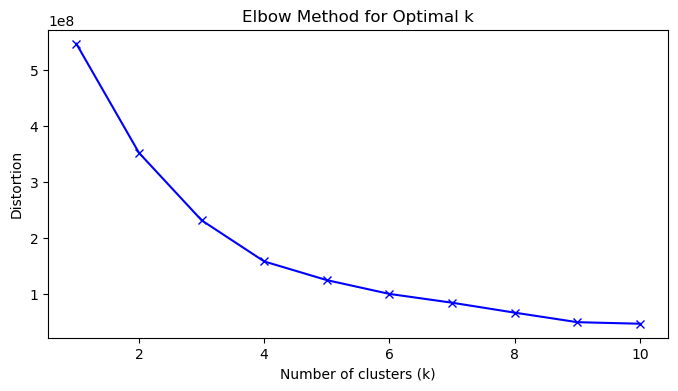

In [191]:
def plot_elbow_method(X, max_k=10):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Plot the elbow method to find the optimal number of clusters
features = ["total_amount","DOLocationID","PULocationID"]
plot_elbow_method(dfTest[features])

In [192]:
#features = ["passenger_count", "trip_distance", "PULocationID", "time_diff_seconds", "total_amount"]
#features =["trip_distance", "time_diff_seconds"]
df_selected = dfTest[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

kmeans = KMeans(n_clusters=4, random_state=42) 
dfTest['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\2186519117.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['cluster'] = kmeans.fit_predict(df_scaled)


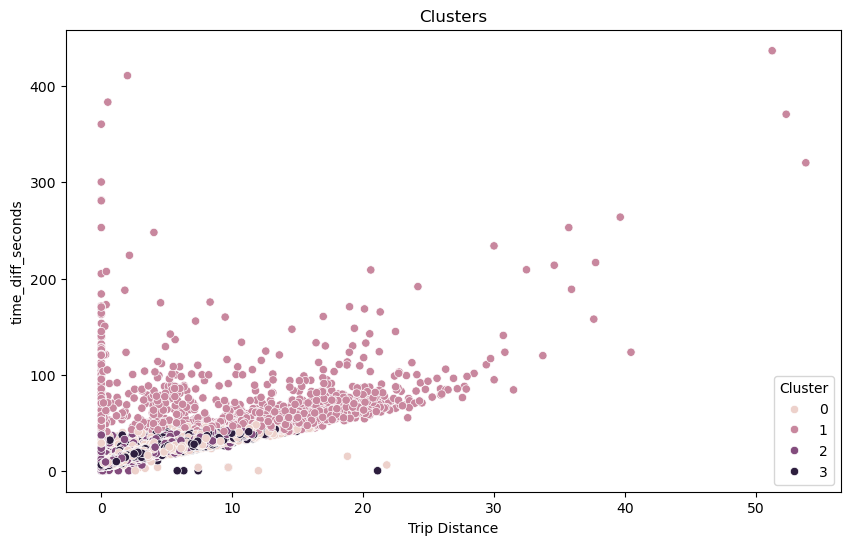

In [193]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfTest, x='trip_distance', y='total_amount', hue='cluster')
plt.xlabel('Trip Distance')
plt.ylabel('time_diff_seconds')
plt.title('Clusters')
plt.legend(title='Cluster')
plt.show()


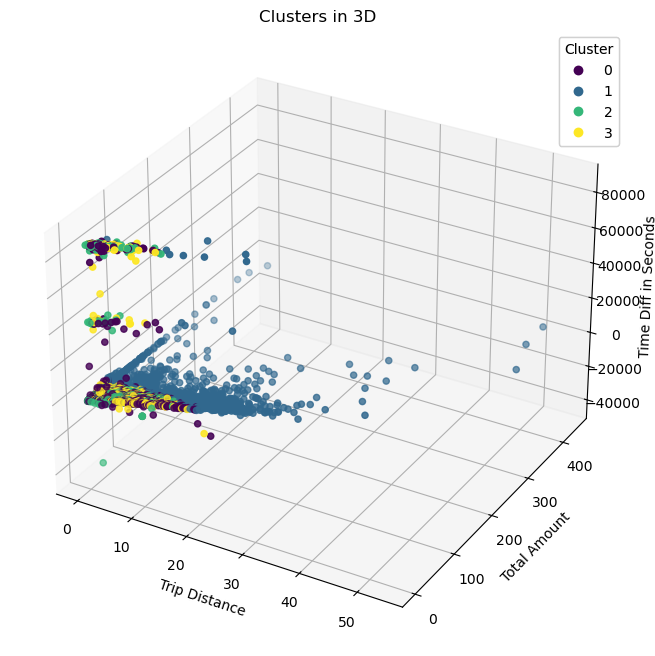

In [194]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three variables
scatter = ax.scatter(dfTest['trip_distance'], dfTest['total_amount'], dfTest['time_diff_seconds'], c=dfTest['cluster'], cmap='viridis')

# Labels and title
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Total Amount')
ax.set_zlabel('Time Diff in Seconds')
ax.set_title('Clusters in 3D')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show the plot
plt.show()


In [195]:
location_pair_counts = dfTest.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')

print(location_pair_counts.sort_values(ascending=False, by = "count"))


      PULocationID  DOLocationID  count
1591            79            79    279
7324           264           264    262
844             48            48    202
7197           263           141    169
3757           148            79    153
...            ...           ...    ...
3310           141           188      1
3312           141           196      1
3313           141           198      1
3314           141           202      1
3665           145           191      1

[7330 rows x 3 columns]


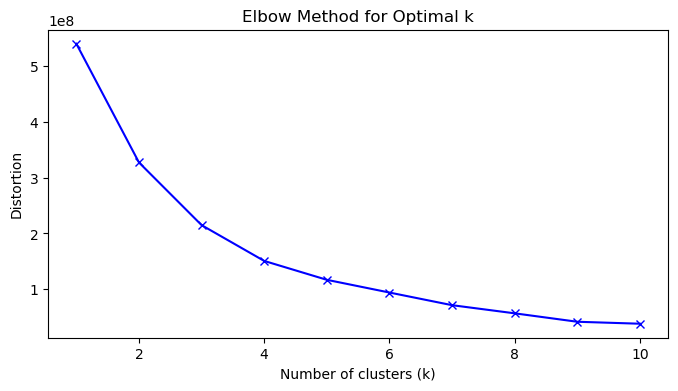

In [211]:
features = ["DOLocationID","PULocationID", "tip_amount"]
plot_elbow_method(dfTest[features])

In [198]:
dfTest.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'time_diff',
       'time_diff_seconds', 'cluster'],
      dtype='object')

In [212]:
dfTest.drop(columns=["cluster"])
df_selected = dfTest[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

kmeans = KMeans(n_clusters=4, random_state=42) 
dfTest['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\2389757383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_14308\2586487859.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=dfTest, x='trip_distance', y='total_amount', hue='cluster', palette=palette)


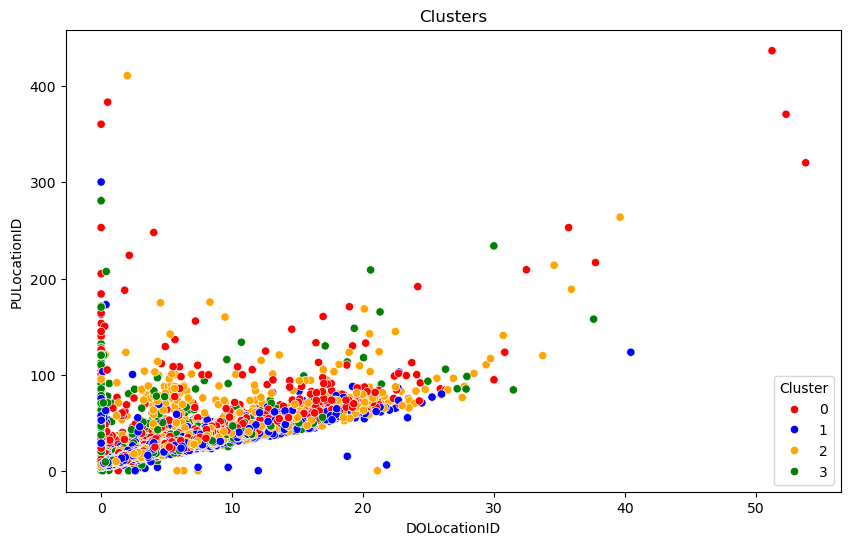

In [213]:

plt.figure(figsize=(10, 6))

palette = ['red', 'blue', 'orange', 'green', 'purple']
sns.scatterplot(data=dfTest, x='trip_distance', y='total_amount', hue='cluster', palette=palette)
plt.xlabel('DOLocationID')
plt.ylabel('PULocationID')
plt.title('Clusters')
plt.legend(title='Cluster')
plt.show()
